In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set()

In [4]:
%config InlineBackend.figure_format = 'svg'

In [5]:
# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

In [6]:
df = pd.read_csv('../data/telecom_churn.csv')

In [7]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,...,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,...,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,...,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,...,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,...,8.41,10.1,3,2.73,3,False


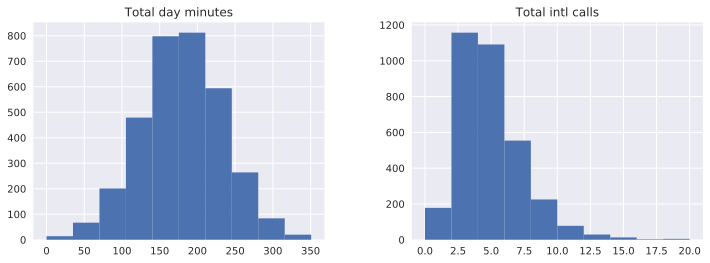

In [9]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(12, 4));

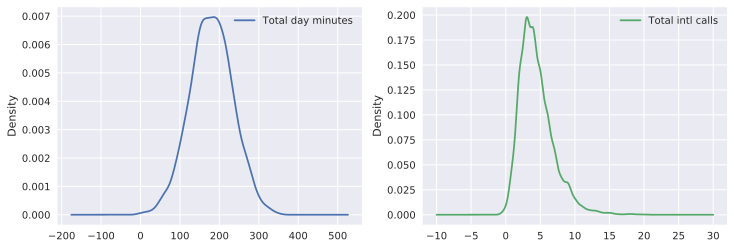

In [15]:
df[features].plot(kind='density', subplots=True, layout=(1,2), figsize=(12,4), sharex=False);

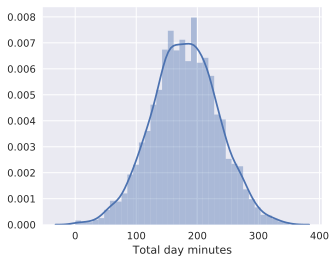

In [16]:
sns.distplot(df['Total day minutes'])

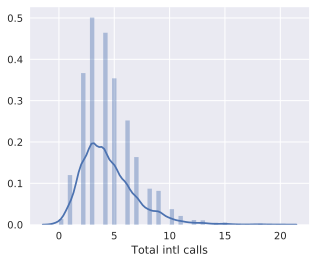

In [18]:
sns.distplot(df['Total intl calls']);

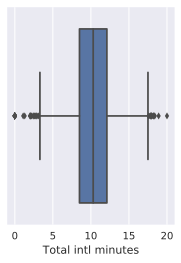

In [24]:
_, ax = plt.subplots(figsize=(3, 4));
sns.boxplot(df['Total intl minutes'], ax=ax)

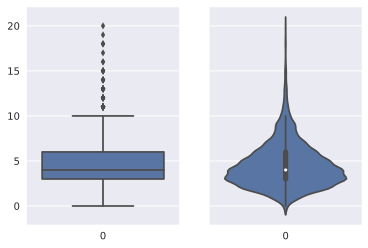

In [25]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]); sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

In [28]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

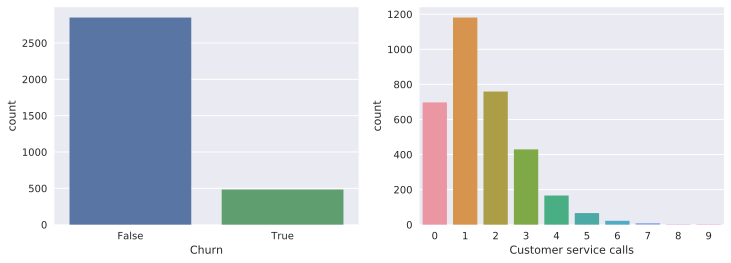

In [29]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='Churn', data=df, ax=ax[0])
sns.countplot(x='Customer service calls', data=df, ax=ax[1])

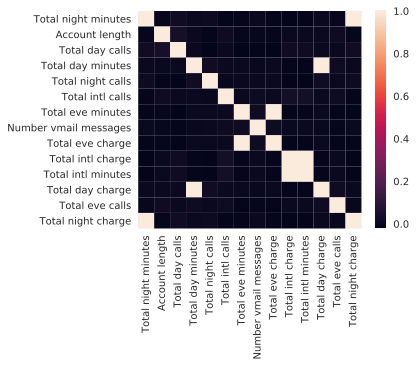

In [30]:
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 
                      'Voice mail plan', 'Area code', 'Churn',
                      'Customer service calls']))
# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [32]:
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 
                      'Total night charge', 'Total intl charge']))

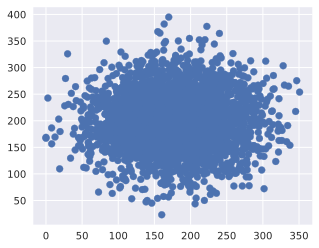

In [35]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

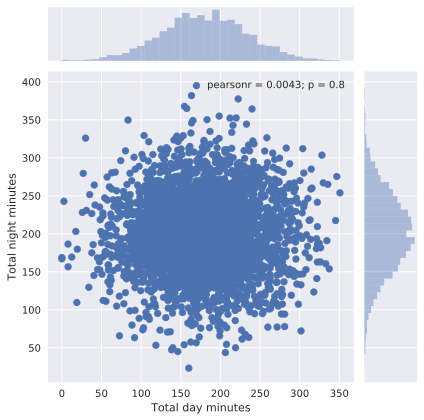

In [36]:
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='scatter')

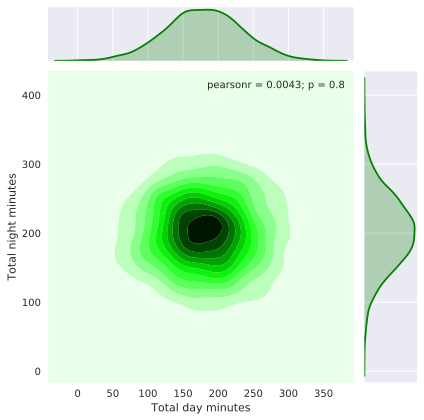

In [37]:
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='kde', color='g')

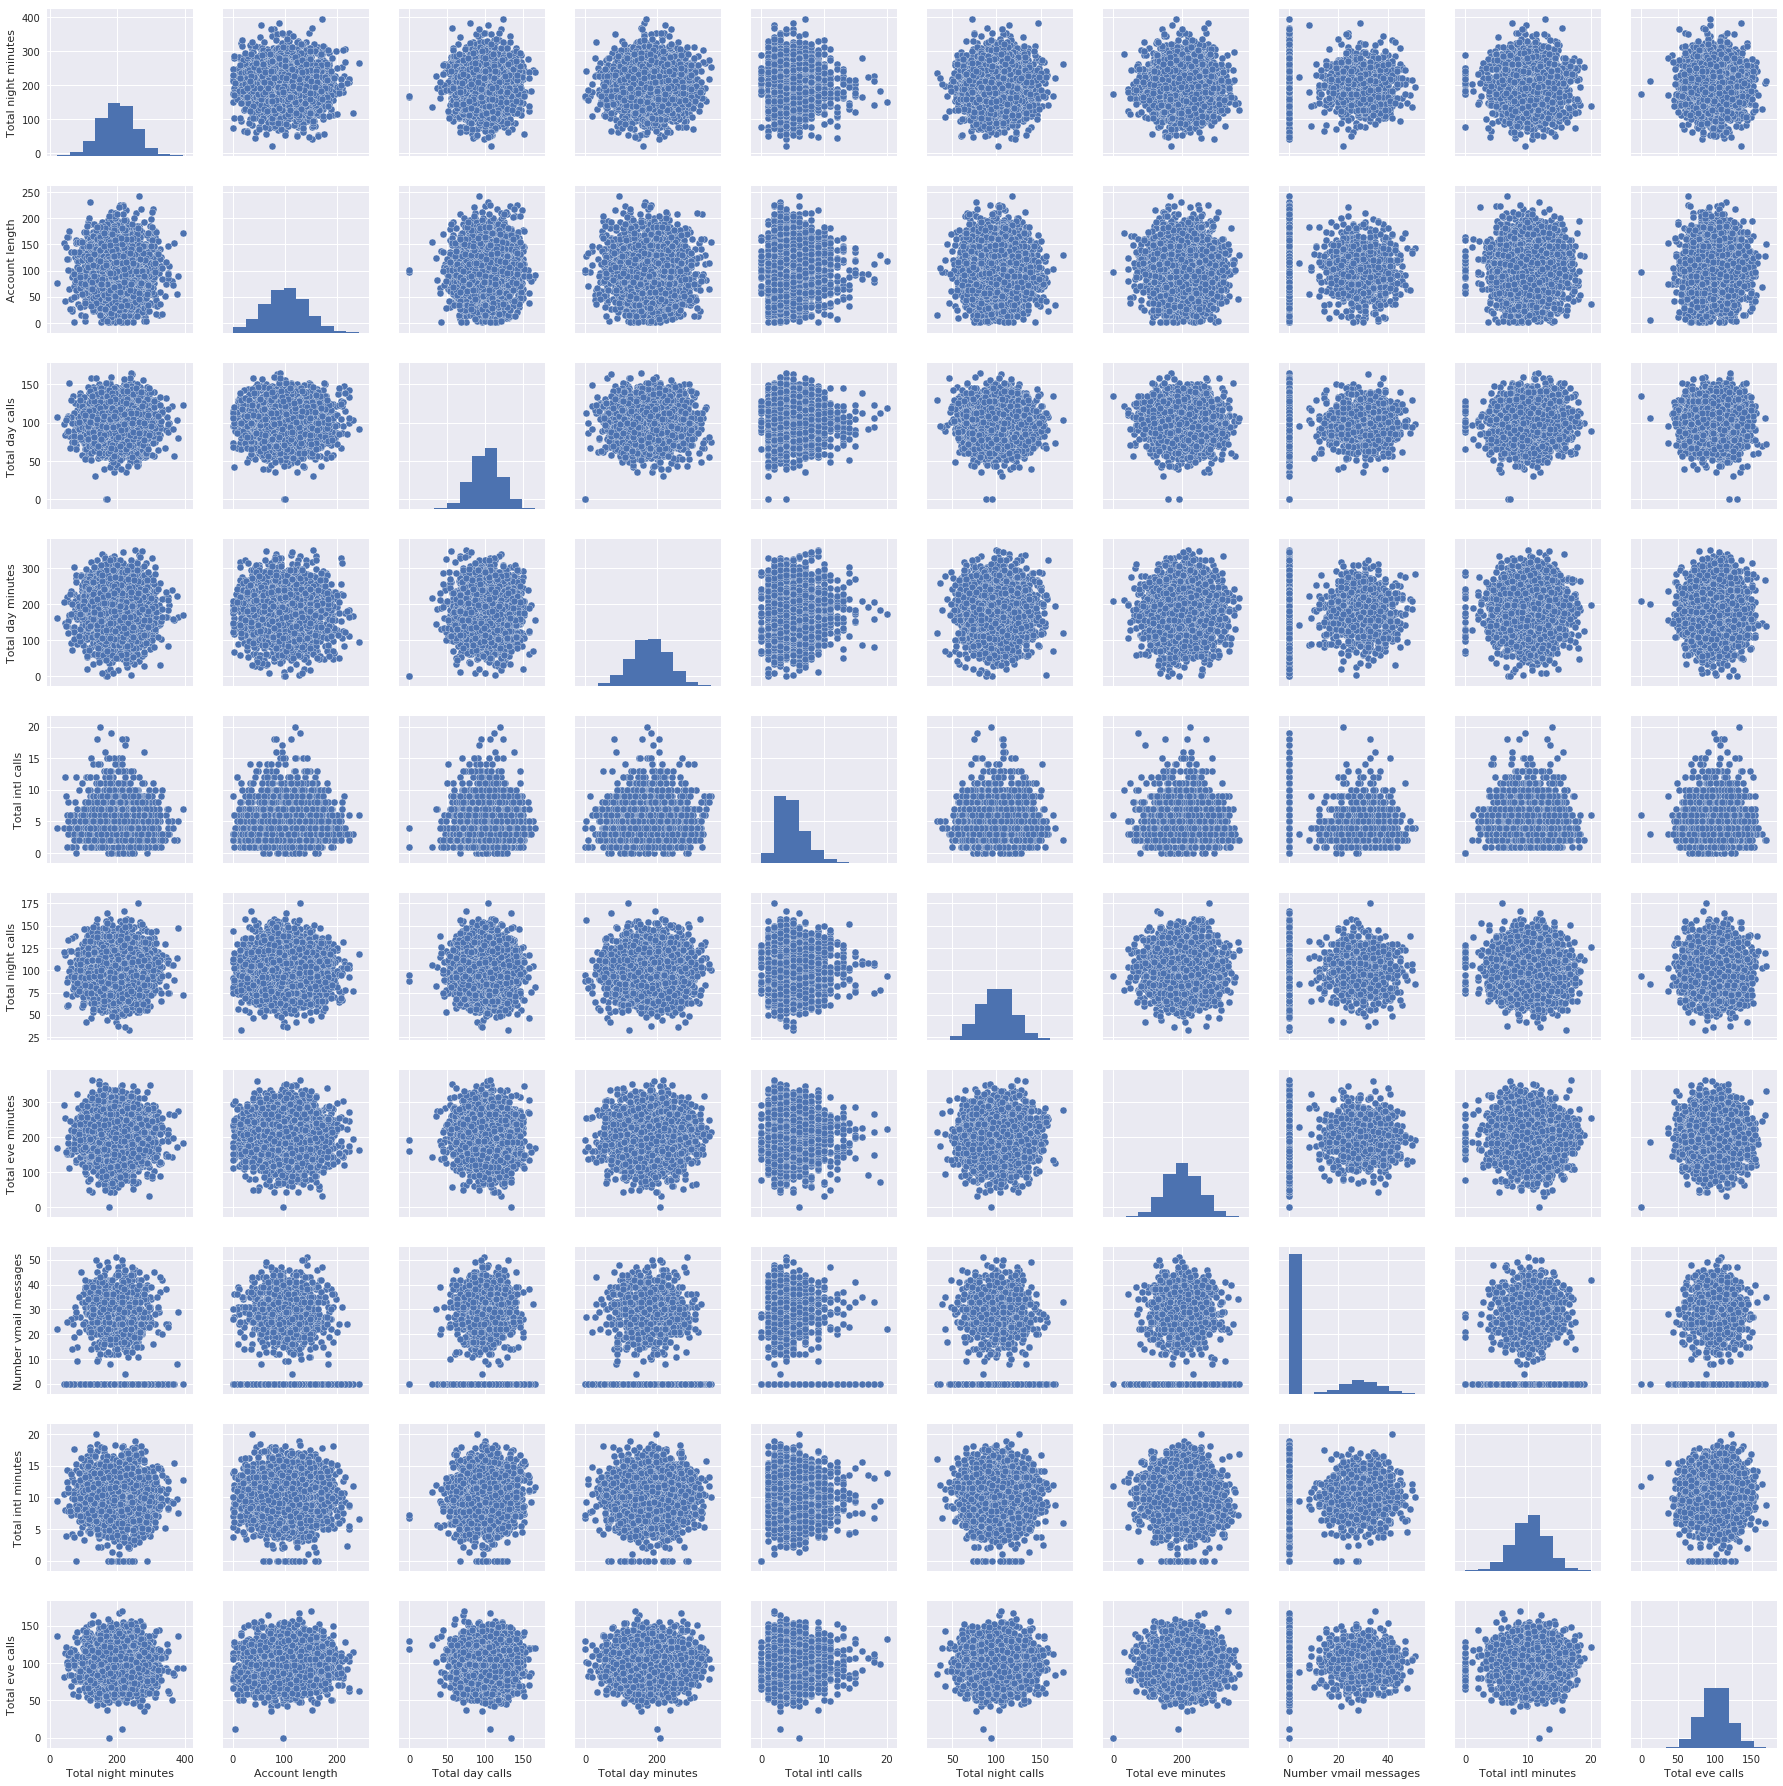

In [38]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

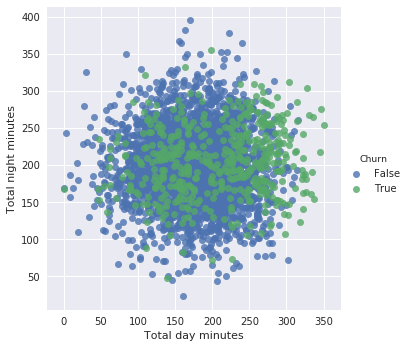

In [40]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False)

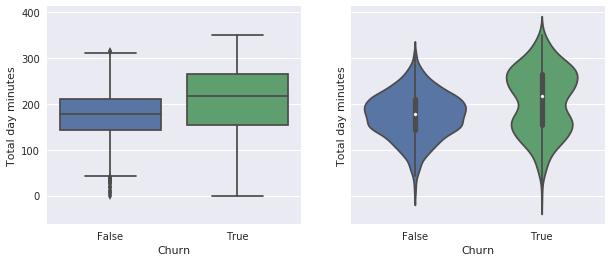

In [41]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 
sns.boxplot(x='Churn', y='Total day minutes',
            data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', 
               data=df, ax=axes[1]);


In [46]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [47]:
X = df.drop(['Churn', 'State'], axis=1)

In [51]:
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})

In [53]:
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
%%time
tsne = TSNE(random_state=19)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 41.8 s, sys: 2.49 s, total: 44.2 s
Wall time: 44.2 s


In [72]:
tsne_repr.shape

(3333, 2)

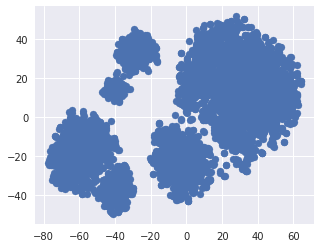

In [73]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1])

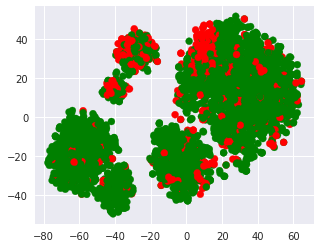

In [74]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df['Churn'].map({False: 'green', True: 'red'}))

Text(0.5,1,'International plan')

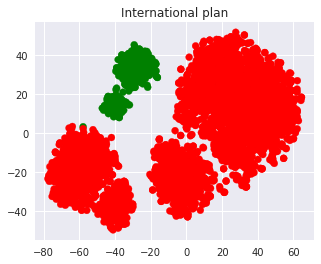

In [75]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df['International plan'].map({'Yes': 'green', 'No': 'red'}))
plt.title('International plan')

Text(0.5,1,'Voice mail plan')

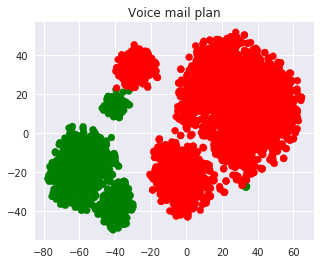

In [76]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df['Voice mail plan'].map({'Yes': 'green', 'No': 'red'}))
plt.title('Voice mail plan')